# <p style = "text-align: center"> **Image Classification of Parasitized and Uninfected Cells** </p>

This project focuses on developing a machine learning model to classify images of parasitized and uninfected cells. Using TensorFlow and Keras, I built a convolutional neural network (CNN) with data augmentation techniques to enhance the model's performance. The model achieved an accuracy of approximately 94%, demonstrating its effectiveness in distinguishing between the two types of cells. This project marks an exciting step in my data science journey, and I am eager to continue learning and improving my skills in this field.

## Example Images of Cells:
---

<center>
  
| **Parasitized Cell** | **Uninfected Cell** |
|:--------------------:|:-------------------:|
|<img src="Sample_From_Dataset\Parasitized\C33P1thinF_IMG_20150619_121102a_cell_193.png" width="300">|<img src="Sample_From_Dataset\Uninfected\C1_thinF_IMG_20150604_104722_cell_15.png" width="300">|
|<img src="Sample_From_Dataset\Parasitized\C37BP2_thinF_IMG_20150620_131423a_cell_92.png" width="300">|<img src="Sample_From_Dataset\Uninfected\C1_thinF_IMG_20150604_104919_cell_31.png" width="300">|

</center>



# Importing the necessary libraries

We will need:

- *TensorFlow and Keras*: Frameworks for building and training neural networks.

- *Conv2D, MaxPooling2D, Dense, Flatten, Dropout*: Layers commonly used in CNNs for feature detection, down-sampling, and preventing overfitting.

- *EarlyStopping*: Callback to stop training when performance stops improving.
regularizers: Techniques to prevent overfitting.

- *Matplotlib (plt)*: For plotting and visualizing data.

- *OpenCV (cv)*: For image processing tasks.

- *NumPy (np)*: For numerical operations and array handling.

These tools are essential for constructing and optimizing the CNN model in this project.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
#import cv2 as cv
import numpy as np

In [3]:
# Load dataset

# This will only target in the folder, in our case, 2 subfolder and label them respectively

dataset = tf.keras.utils.image_dataset_from_directory('cell_images')

dataset_itrt =  dataset.as_numpy_iterator()
batch = dataset_itrt.next()

Found 27558 files belonging to 2 classes.


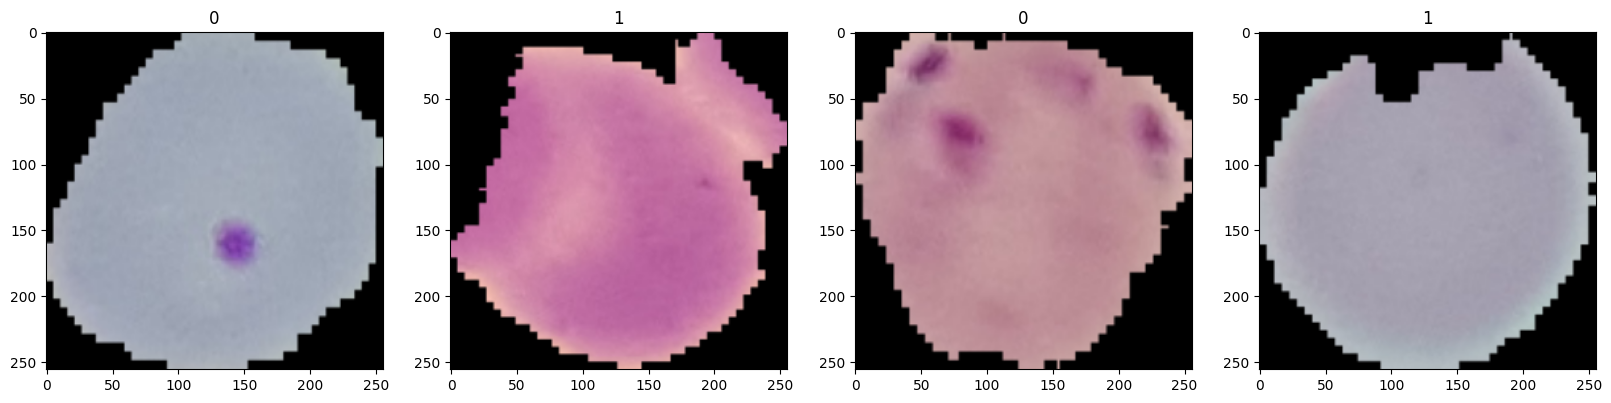

In [4]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [6]:
# Scaling the dataset
scaled_dataset = dataset.map(lambda x, y: (x/255, y))

In [7]:
scaled_itrt = scaled_dataset.as_numpy_iterator()

In [8]:
batch = scaled_itrt.next()

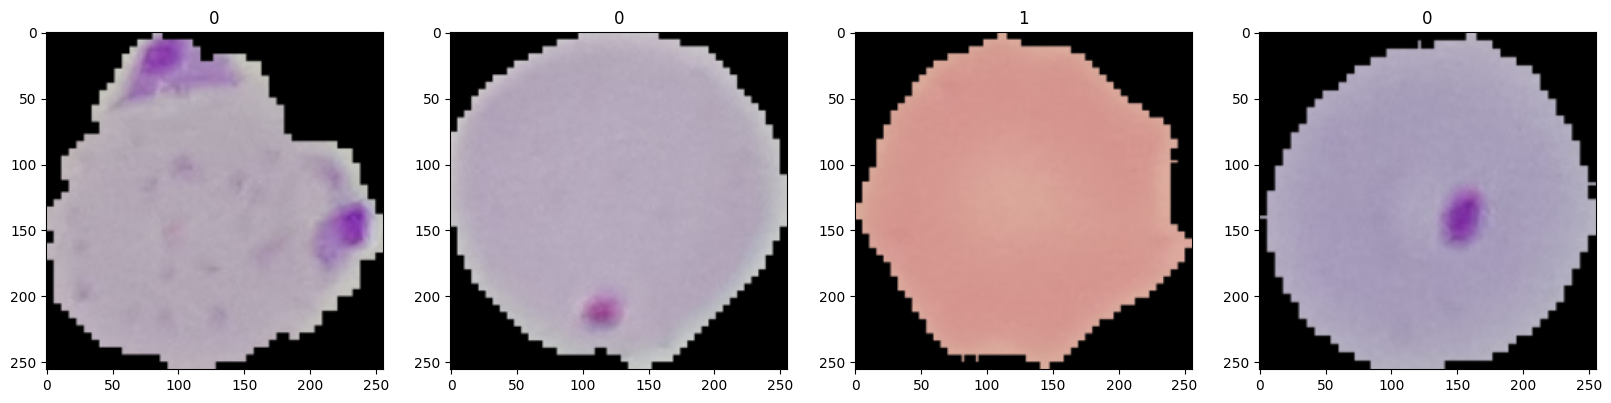

In [9]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

In [10]:
# Split dataset into train, validation, and test sets
batch_number = len(scaled_dataset)

In [11]:
print(batch_number)

862


In [12]:

# The model learns from the patterns and relationships present in the training data
train_size = int((0.7 * batch_number))

# After each training epoch or iteration, the model's performance is evaluated on the validation set to monitor for overfitting and determine the optimal hyperparameters
val_size = int((0.2 * batch_number))

# completely independent subset of the dataset, not used during training or hyperparameter tuning.
# The test set provides an unbiased estimate of the model's performance on unseen data.
test_size = int((0.1 * batch_number))


In [13]:
print('train_size: ', train_size)
print('val_size: ', val_size)
print('test_size: ', test_size)

train_size:  603
val_size:  172
test_size:  86


In [14]:

train_dataset = scaled_dataset.take(train_size)
val_dataset = scaled_dataset.skip(train_size).take(val_size)
test_dataset = scaled_dataset.skip(train_size + val_size).take(test_size)


In [15]:

# Data augmentation, given the nature of medical imaging
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Build model
model = Sequential([
    data_augmentation,
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])



In [16]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [18]:
# Train model
# history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[early_stopping])

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], color='blue', label="train_loss")
ax[0].plot(history.history['val_loss'], color='red', label="val_loss")
ax[0].set(
    title = "Loss Plot",
    xlabel ="Epochs",
    ylabel = "Loss"
)
ax[0].legend(loc = "upper right")

ax[1].plot(history.history['accuracy'], color='blue', label="accuracy")
ax[1].plot(history.history['val_accuracy'], color='red', label="val_accuracy")
ax[1].set(
    title = "Accuracy Plot",
    xlabel ="Epochs",
    ylabel = "Accuracy"    
)
ax[1].legend(loc = "lower right")
fig.suptitle('Training Stats', fontsize = 20)
fig.tight_layout(pad=4)

plt.show()

In [ ]:
# Save the model
model.save('malaria_classification_model.keras')

In [1]:
# Testing the Model Prediction Accuracy

from tensorflow.keras.models import load_model


In [5]:

trained_model = load_model(r'C:\Users\Bildad Otieno\Documents\Billy_Repo\CEMA\malaria_classification_model.keras')

OSError: Unable to open file (file signature not found)

In [ ]:

img = cv.imread(r'c:\Users\Bildad Otieno\Documents\Billy_Repo\CEMA\test1.PNG')
plt.imshow(img)
plt.show()

: 

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

: 

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

: 

In [ ]:
print(yhat)

: 

In [ ]:
# Display predictions
if yhat[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

: 

In [ ]:
img2 = cv.imread(r'c:\Users\Bildad Otieno\Documents\Billy_Repo\CEMA\test2.PNG')
plt.imshow(img2)
plt.show()

: 

In [ ]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

: 

In [ ]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

: 

In [ ]:
print(yhat2)

: 

In [ ]:
# Display predictions
if yhat2[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

: 